The following project is about the analysis of a dataset contaning data about laptops. The project can be divided in the following sections:

Dataset cleaning
Exploratory Data Analysis
ML modeling by Linear Regression and Random Forest
Results Summary

#Data Analysis Summary
- General infos:
    - The majority of laptops are from Dell, lenovo and HP.
    - The majority of laptops are Notebooks, which make 55.84% of the total laptops
    - Most laptops have 15.6 inches, which make 51.08% of the total laptops
- Price:
    - There are laptops with prices over 3000:
        - Most of them are Gaming PCs or Workstations with intel CPU.
        - There is also one Notebook with a price close to 5000 euros and Gaming laptops, with a price close to 5500 euros and 6000 euros
    - The most expensive notebook is the Lenovo Thinkpad P51, with an Intel XEON CPU and Nvidia Quadro GPU!
- Brand:
    - Laptops with Intel CPUs are more expensive.
    - Laptops with an AMD CPUs also hahave and AMD GPUs
    - Laptops with Nvidia GPUs are more expensive.
- RAM:
    - According to the slope of the linear regression between price and RAM, every GB of RAM added on the PC adds roughly 107$ to the laptop value.
    - Most laptops have 8 GB RAM, which make 47.54% of the total laptops
- GPU:
    - The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Nvidia GTX1050.
- CPU:
    - All the TOP 15 most common CPUs are from Intel.
    - The most common CPU is the Intel i5 7200U, second is i7 7700HQ and third is i7 7500U.
    - Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).
    - Most laptops have 2.5 GHz CPU, which make 22.5% of the total laptops  
- Hard drives:
    - Most PCs have 256 GB of storage, which is for the most part SSD. Moreover, for storage of 1 TB or higher, most of them are HDD.
    - Most of second hard drive storages are 1 TB HDD disks
- Correlation Matrix:
    - RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric
    - CPU Freq has a quite moderate positive correlation with the price (+0.45)
    - Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving laptop_price.csv to laptop_price.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['laptop_price.csv']), encoding='latin1')


In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


###Using the 'describe' method of the dataframe, we can get some first insights on the numerical columns.


-LaptopID: We can se that also laptopID is included as a numerical features, with a minimum value of 1 and max of 1320, different from the index (0-1303). This will be investigated later.

-Inches: the nimimum inches is 10,1, while the max is 18.4 and the mean is around 15 inches

-Price_euros:miimuim price is 174 euros, the max is 6099 and the mean is 1123, which is kinda high for a laptop

#Data Cleaning

Before exploring the data with EDA, we will perform some data cleaning.

Checking number of null values

In [ ]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [ ]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [ ]:
def mem(x):
    ar = x.split()
    total_storage = 0
    for i in ar:
        if i[-2:] =="GB":
            total_storage += float(i[:-2])
        elif i[-2:] =="TB":
            total_storage += float(i[:-2])*1024
    return int(total_storage)
def ssd(x):
    ar = x.split()
    total_storage = 0
    for i in range(len(ar)-1):
        if ar[i][-2:] =="GB" and ar[i+1] == "SSD":
            total_storage += float(ar[i][:-2])
        elif ar[i][-2:] =="TB" and ar[i+1] == "SSD":
            total_storage += float(ar[i][:-2])*1024
    return int(total_storage)
def hdd(x):
    ar = x.split()
    total_storage = 0
    for i in range(len(ar)-1):
        if ar[i][-2:] =="GB" and ar[i+1] == "HDD":
            total_storage += float(ar[i][:-2])
        elif ar[i][-2:] =="TB" and ar[i+1] == "HDD":
            total_storage += float(ar[i][:-2])*1024
    return int(total_storage)
def flash(x):
    ar = x.split()
    total_storage = 0
    for i in range(len(ar)-1):
        if ar[i][-2:] =="GB" and ar[i+1].upper() == "FLASH":
            total_storage += float(ar[i][:-2])
        elif ar[i][-2:] =="TB" and ar[i+1].upper() == "FLASH":
            total_storage += float(ar[i][:-2])*1024
    return int(total_storage)
df["Total Storage"] = df["Memory"].apply(mem)
df["SSD Storage"] = df["Memory"].apply(ssd)
df["HDD Storage"] = df["Memory"].apply(hdd)
df["Flash Storage"] = df["Memory"].apply(flash)

In [ ]:
df["Ram"] = df["Ram"].str.replace('GB', '')
df["Weight"] = df["Weight"].str.replace('kg', '')
df["Ram"] = df["Ram"].astype('int32')
df["Weight"] = df["Weight"].astype('float32')
new = df["ScreenResolution"].str.split("x", n = 1, expand = True)
df["X_res"]= new[0]
df["Y_res"]= new[1]
df["Y_res"]= pd.to_numeric(df["Y_res"])
df["Y_res"]= df["Y_res"].astype(float)
df["X_res"]=(df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
df["X_res"]=pd.to_numeric(df["X_res"])
df["PPI"]=(((df["X_res"]**2+df["Y_res"]**2)**(1/2))/df["Inches"]).astype(float)
df["ScreenResolution"]=(df["X_res"]*df["Y_res"]).astype(float)
df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Total Storage,SSD Storage,HDD Storage,Flash Storage,X_res,Y_res,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,128,0,0,2560.0,1600.0,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128,0,0,128,1440.0,900.0,127.677940
2,3,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,256,0,0,1920.0,1080.0,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,512,0,0,2880.0,1800.0,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,256,0,0,2560.0,1600.0,226.983005


In [ ]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Total Storage', 'SSD Storage', 'HDD Storage',
       'Flash Storage', 'X_res', 'Y_res', 'PPI'],
      dtype='object')

This will display the final columns of the dataset after cleaning


#Exploratory Data Analysis EDA

Custom Function to improve readability:

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

##Which brand is the most frequent?

<ipython-input-15-1c538d199bc0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Company', data=df, palette='mako_r', order = df['Company'].value_counts().index)
<ipython-input-15-1c538d199bc0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)


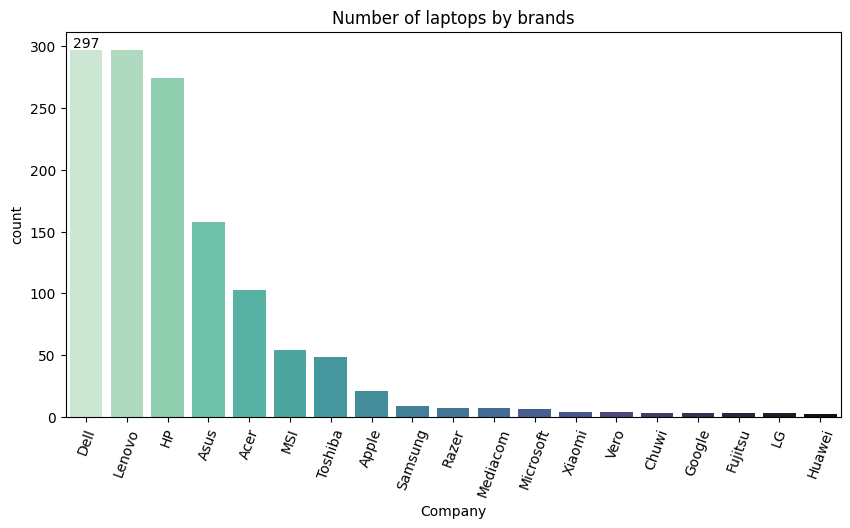

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Company', data=df, palette='mako_r', order = df['Company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

Most of the laptops are of Dell, Lenovo and HP.


##What is the relationship beween Companies and the Price


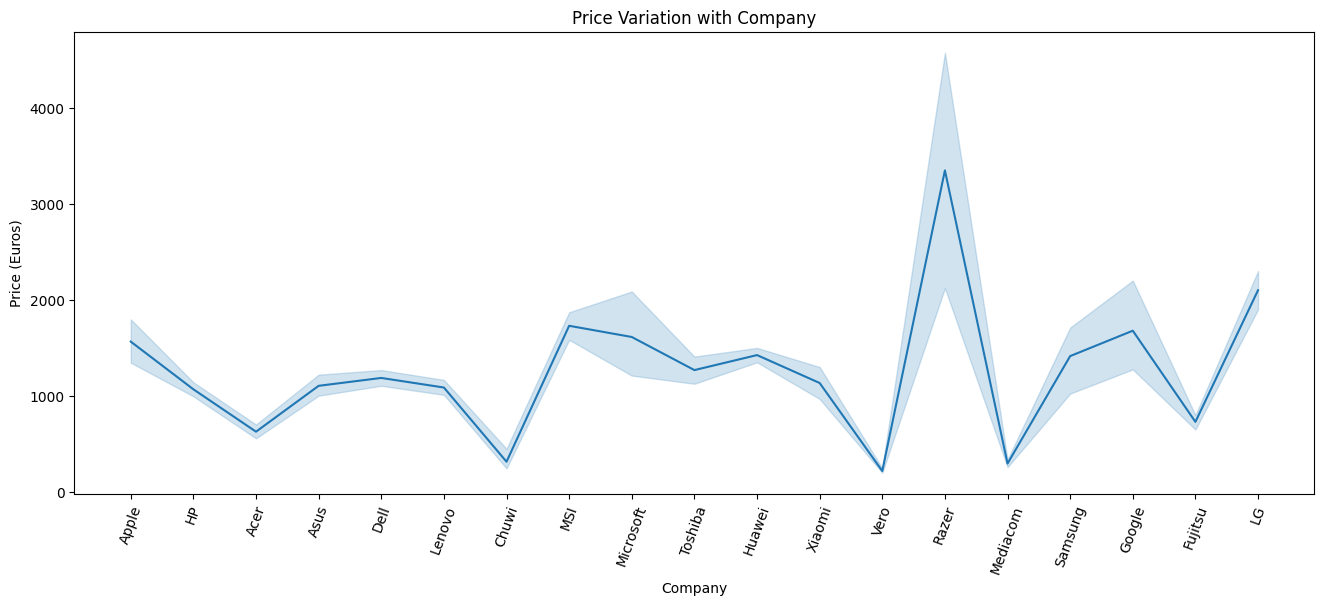

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Company', y='Price_euros', data=df,)
plt.xticks(rotation=70)
plt.title('Price Variation with Company')
plt.xlabel('Company')
plt.ylabel('Price (Euros)')
plt.show()

##What type of laptops are the most frequent?

<ipython-input-17-cb7f5dcccacf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='TypeName', data=df,palette='mako', order = df['TypeName'].value_counts().index)
<ipython-input-17-cb7f5dcccacf>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70);


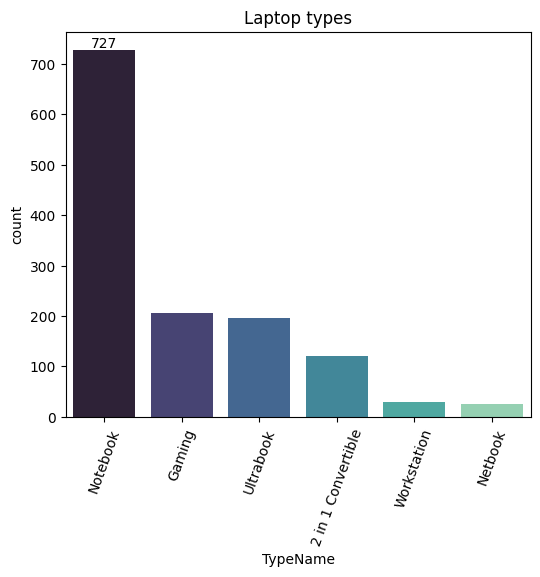

In [ ]:
fig, ax  = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='TypeName', data=df,palette='mako', order = df['TypeName'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

##Relationship between Computer type and Price

<ipython-input-18-6b4a4237be74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TypeName', y='Price_euros', data=avg_price_df, palette='mako_r')
<ipython-input-18-6b4a4237be74>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70);


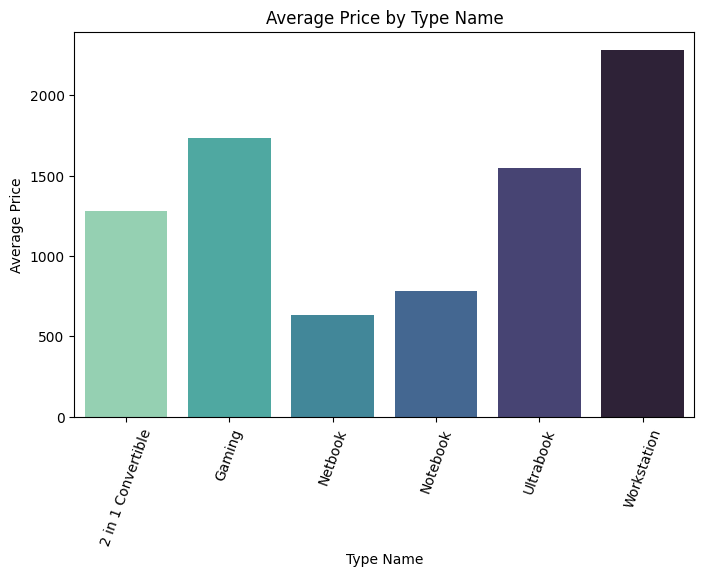

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
avg_price_df = df.groupby('TypeName')['Price_euros'].mean().reset_index()
ax = sns.barplot(x='TypeName', y='Price_euros', data=avg_price_df, palette='mako_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70);
ax.set_xlabel('Type Name')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Type Name')
plt.show()

##Which size if the most popular?

<ipython-input-19-2ef3564ffb91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Inches', data=df, palette='viridis_r')
<ipython-input-19-2ef3564ffb91>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80);


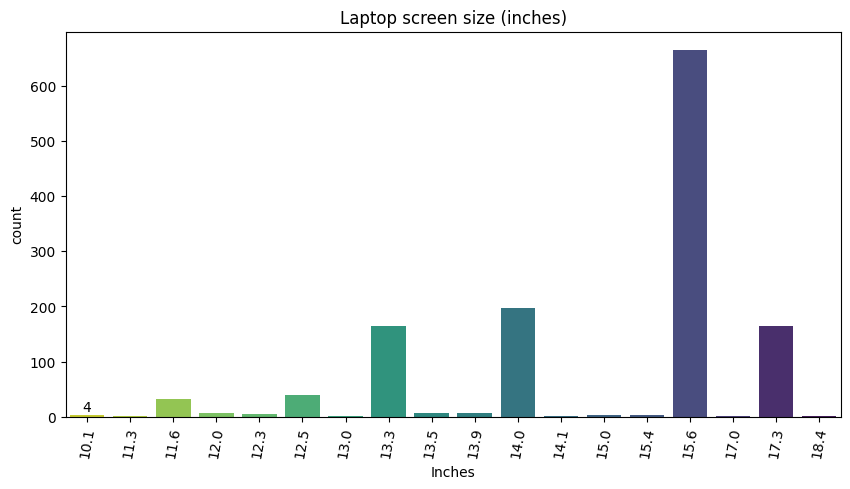

In [ ]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='Inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

##What is the relationship between Price(Euros) and Ram

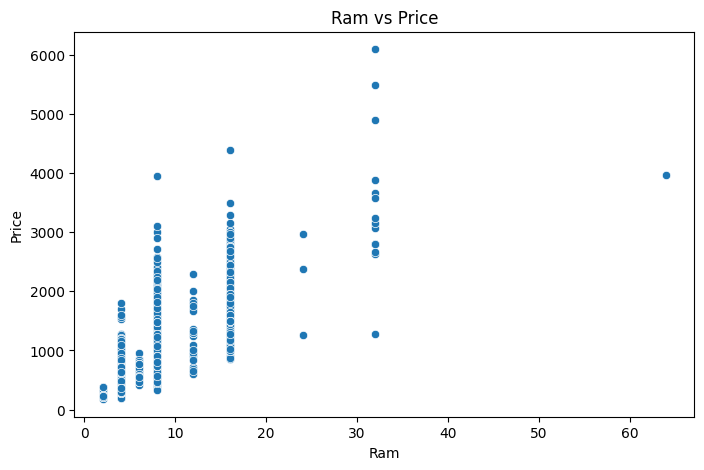

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(x = df['Ram'],y = df['Price_euros'])
ax.set_xlabel('Ram')
ax.set_ylabel('Price')
ax.set_title('Ram vs Price')
plt.show()

<ipython-input-21-540a027211c8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x='Inches', y='Price_euros', data=df, palette='mako_r')


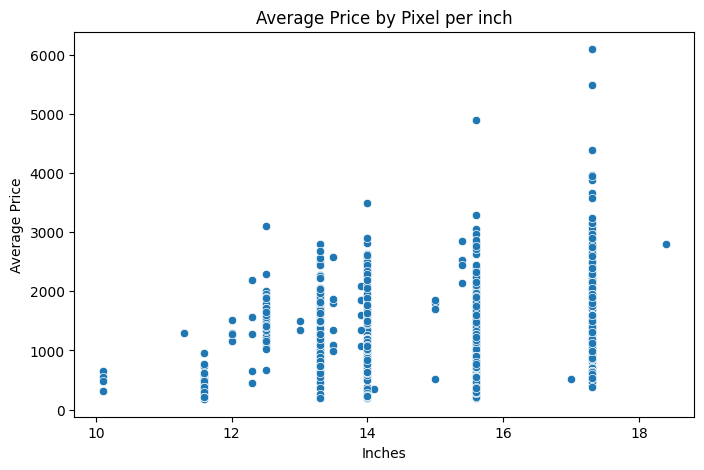

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(x='Inches', y='Price_euros', data=df, palette='mako_r')
ax.set_xlabel('Inches')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Pixel per inch')
plt.show()

##What are the top 25 most common CPUs?



<ipython-input-49-c8be0645f176>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Cpu', data=df,palette='pastel', order = df_top15['Cpu'].value_counts().index)
<ipython-input-49-c8be0645f176>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80);


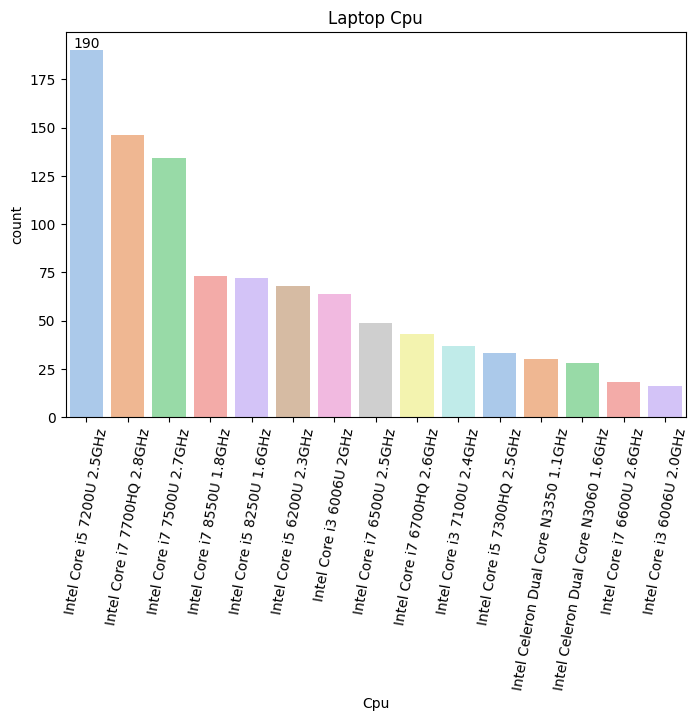

In [ ]:
top_15_cpus = df['Cpu'].value_counts().head(15).index

df_top15 = df[df['Cpu'].isin(top_15_cpus)]
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='Cpu', data=df,palette='pastel', order = df_top15['Cpu'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop Cpu')
plt.show()

- All the TOP 15 most common CPUs are from Intel.
- The most common CPU is the Intel i5 7200U, second is i7 7700HQ and third is i7 7500U.
- Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

<ipython-input-50-1e0f3247dd7e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cpu', y='Price_euros', data=df_top15, order=ordered_df, palette='pastel')
<ipython-input-50-1e0f3247dd7e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80)


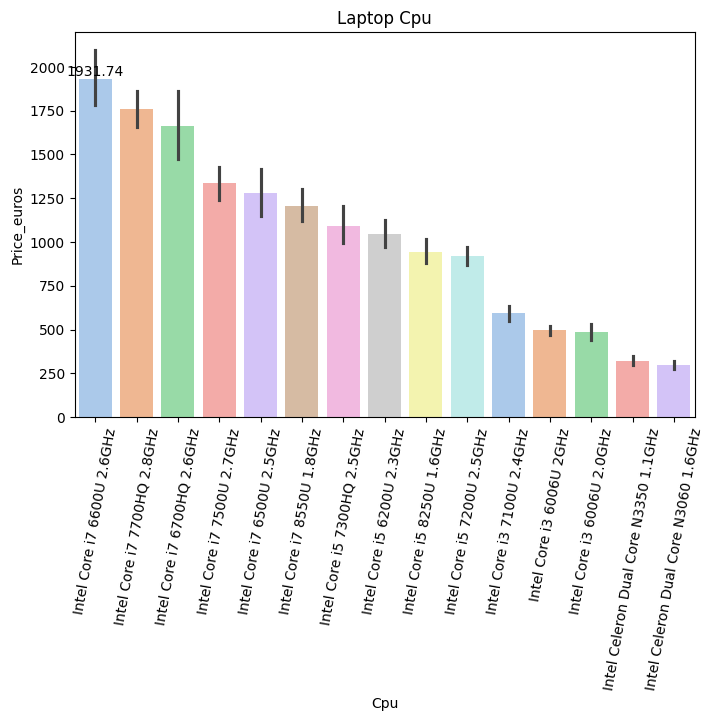

In [ ]:
ordered_df = df_top15.groupby('Cpu')['Price_euros'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x='Cpu', y='Price_euros', data=df_top15, order=ordered_df, palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.bar_label(ax.containers[0])
plt.title('Laptop Cpu')
plt.show()


- All the TOP 15 most common CPUs are from Intel.
- The most expensive CPU is the Intel i7 6600U, second is i7 7700HQ and third is i7 6700HU.

#Which size is most  popular?

<ipython-input-23-f764354d48b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Inches', data=df,palette='pastel', order = df['Inches'].value_counts().index)
<ipython-input-23-f764354d48b8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80);


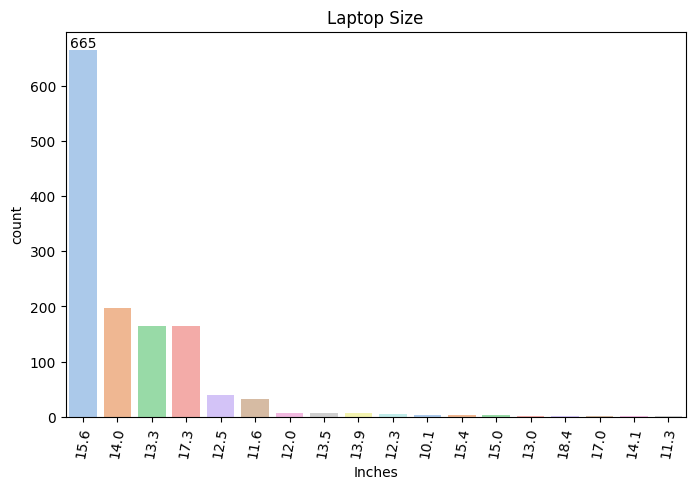

In [ ]:
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='Inches', data=df,palette='pastel', order = df['Inches'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
ax.bar_label(ax.containers[0])
plt.title('Laptop Size')
plt.show()

##Distribution of Numeric Features

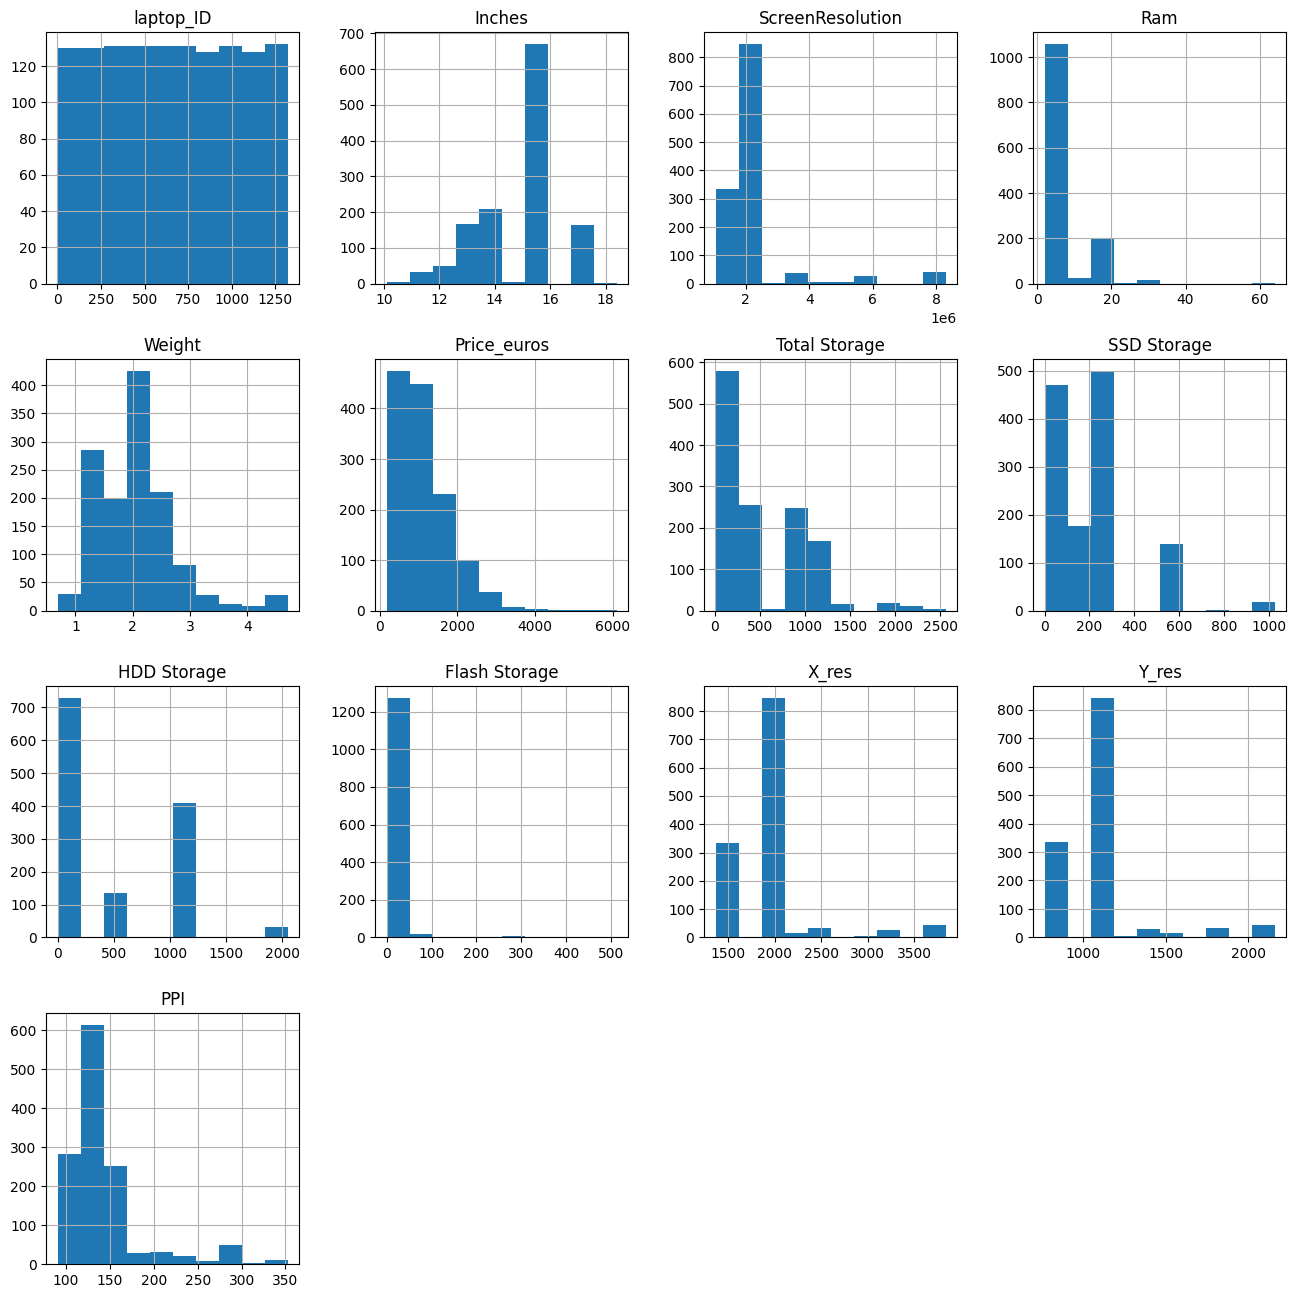

In [ ]:
numplot = df.select_dtypes(include=['number'])
numplot.hist(figsize=(16,16))
plt.show()

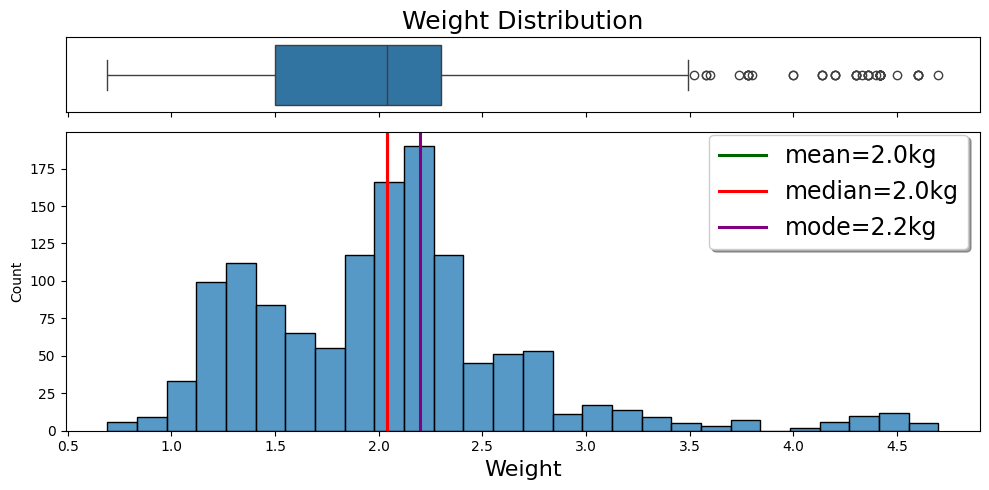

In [ ]:
num_plot(df, 'Weight', 'Weight Distribution','kg')

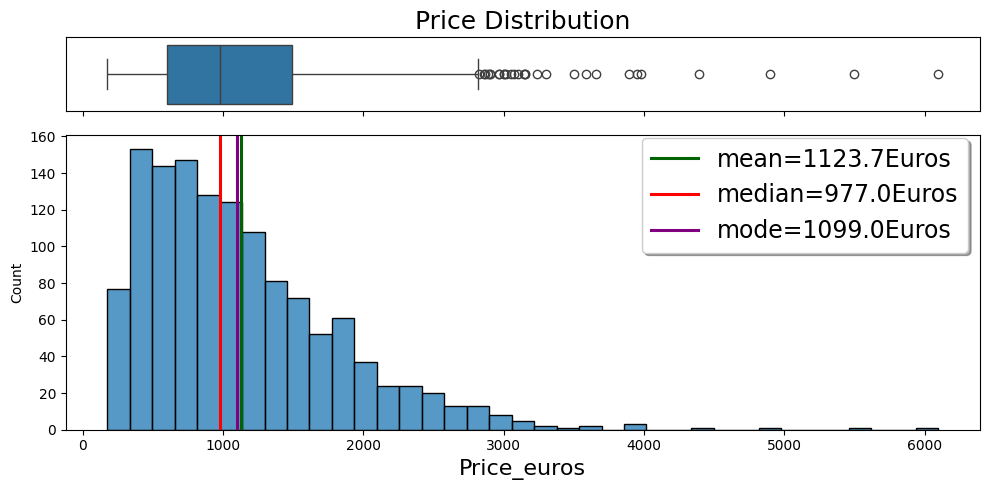

In [ ]:
num_plot(df, 'Price_euros', 'Price Distribution','Euros')

# How is RAM distributed among the laptops?

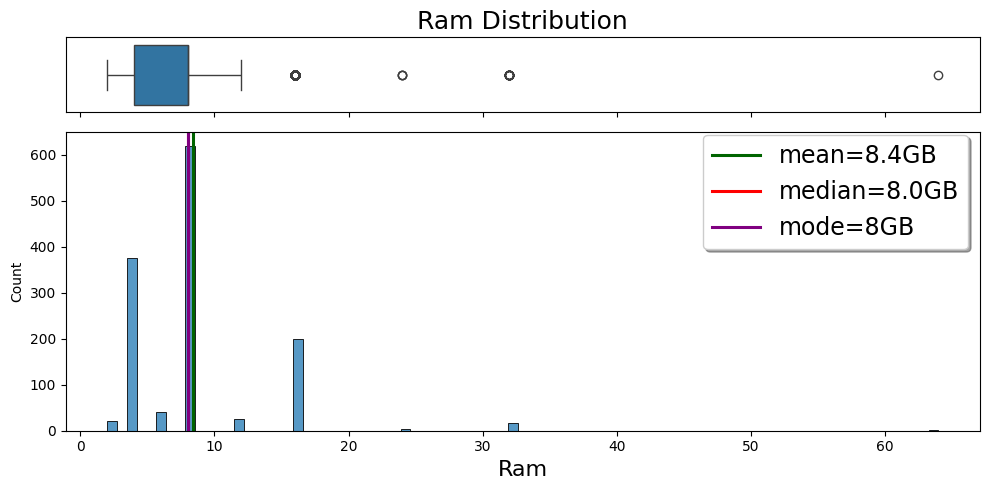

In [ ]:
num_plot(df, 'Ram', 'Ram Distribution','GB')

##Correlation Heatmap of Numerical Features

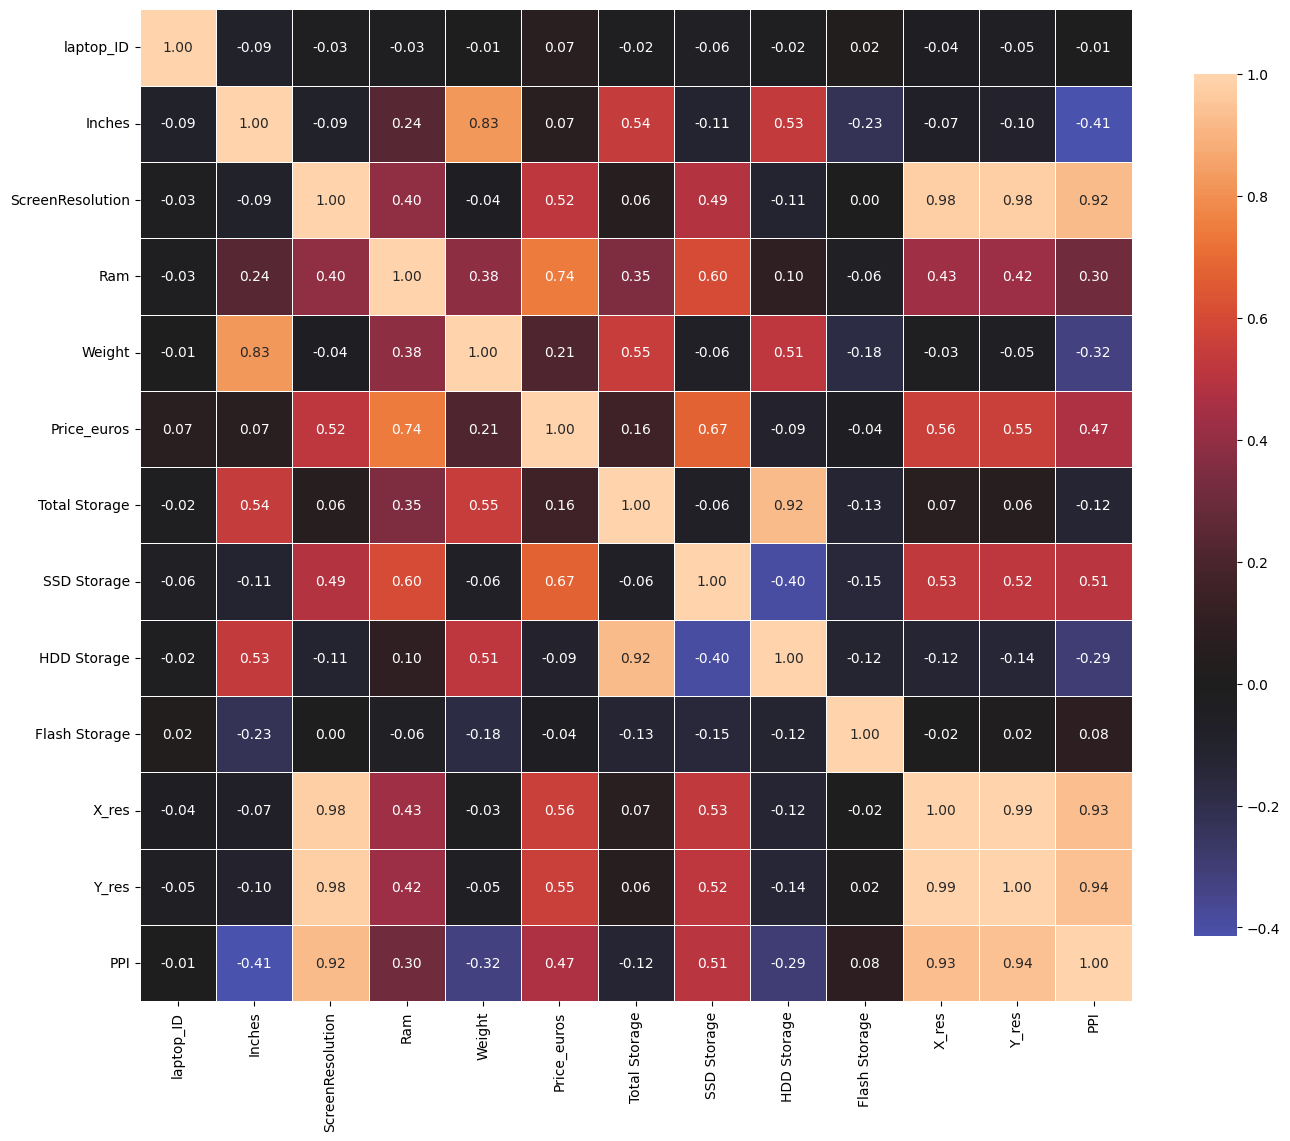

In [ ]:
def correlation_heatmap(train):
    numeric_train = train.select_dtypes(include=['number'])
    correlations = numeric_train.corr()

    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(df)

#Data Preperation

In [ ]:
X = df.drop(['Price_euros'],axis=1)
Y = df['Price_euros'].values
X = X.select_dtypes(exclude=['object'])

#Splitting of data into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared of Linear Regression Model:", r2)


Mean Squared Error: 171525.4323746817
R-squared of Linear Regression Model: 0.6796790301304001


##Actual Price v/s Predicted Price by Linear Regression


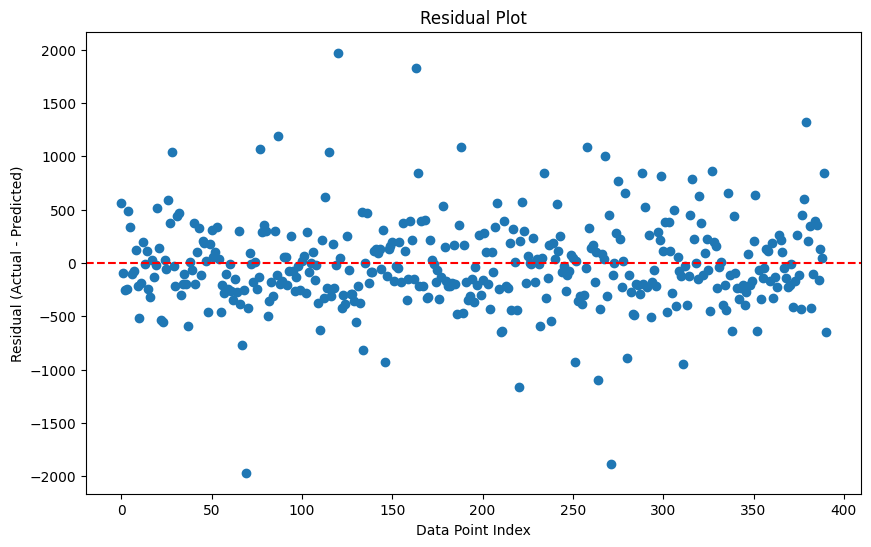

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Data Point Index")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


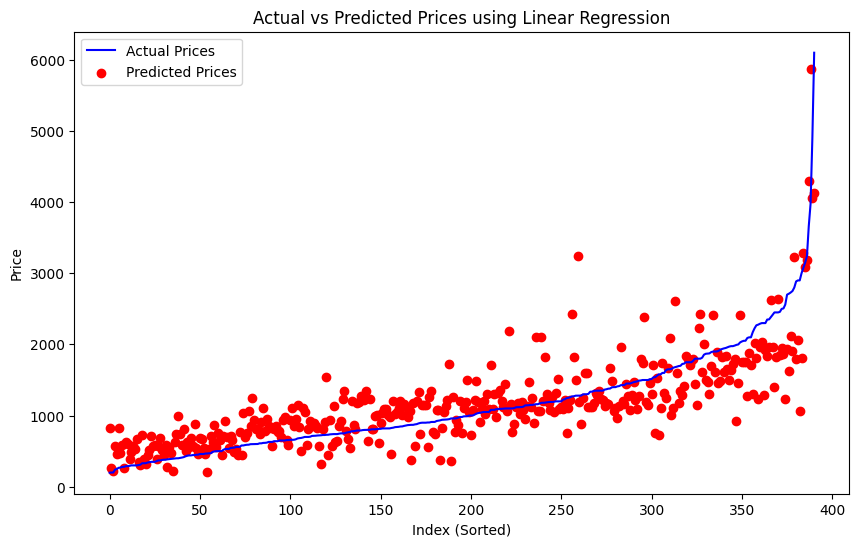

In [ ]:
indices = np.argsort(y_test)
y_test_sorted = y_test[indices]
y_pred_sorted = y_pred[indices]

plt.figure(figsize=(10, 6))

# Plot actual values as a line (blue)
plt.plot(y_test_sorted, color='blue', label='Actual Prices')

# Plot predicted values as dots (red)
plt.scatter(range(len(y_pred_sorted)), y_pred_sorted, color='red', label='Predicted Prices')

plt.xlabel("Index (Sorted)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices using Linear Regression")
plt.legend()
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 144614.3891920074


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared of Random Forest Model:", r2)


R-squared of Random Forest Model: 0.7299349678833913


#Actual Price v/s Predicted Price by Random Forest


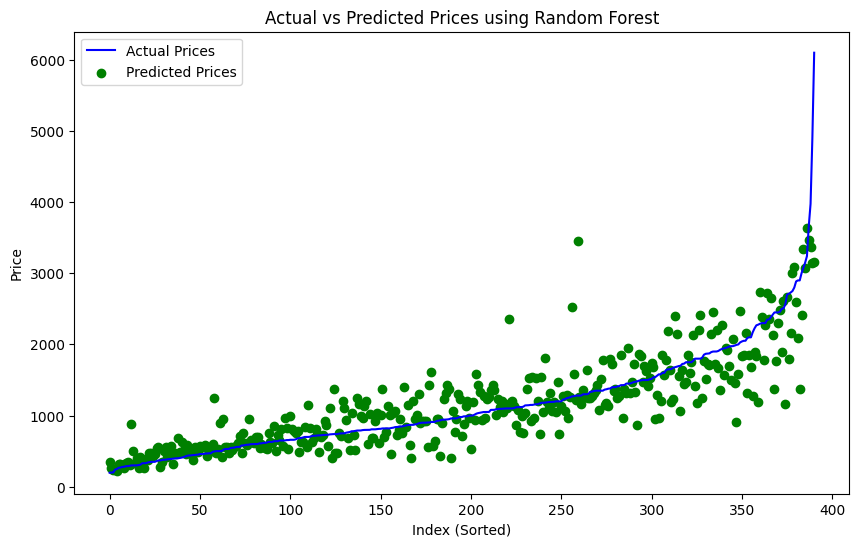

In [ ]:
indices = np.argsort(y_test)
y_test_sorted = y_test[indices]
y_pred_sorted = y_pred[indices]

plt.figure(figsize=(10, 6))

# Plot actual values as a line (blue)
plt.plot(y_test_sorted, color='blue', label='Actual Prices')

# Plot predicted values as dots (red)
plt.scatter(range(len(y_pred_sorted)), y_pred_sorted, color='green', label='Predicted Prices')

plt.xlabel("Index (Sorted)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices using Random Forest")
plt.legend()
plt.show()

When using a random forest regressor, there is the possibility to plot the feature importance determined by the algorithm to perform the regression. It will be visualized to better understand what contributes the most to a laptop price.

#Feature importance by Random Forest

<ipython-input-60-45e35544b6de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values('Importance', ascending=False),palette='pastel')


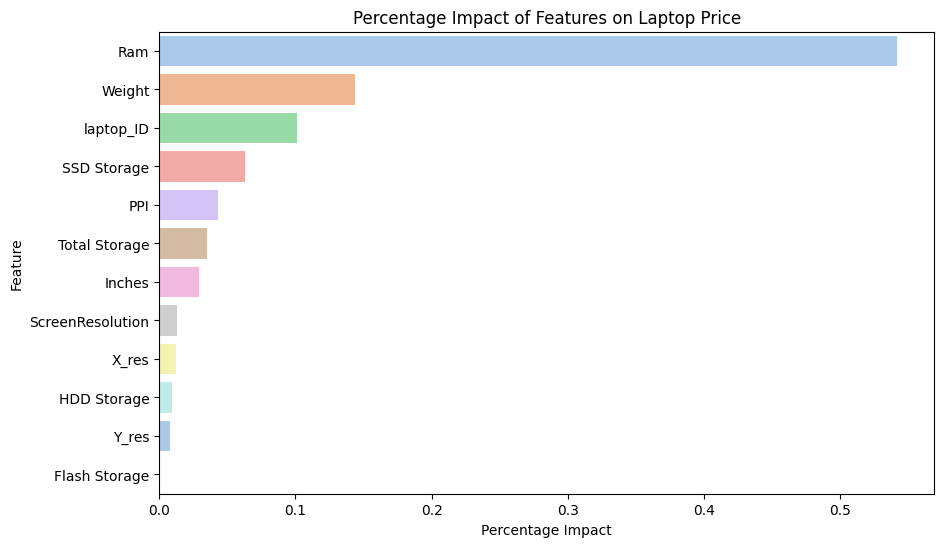

In [ ]:
importances = model2.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
# Use 'feature_importances' instead of 'feature_importances_df'
sns.barplot(x='Importance', y='Feature', data=feature_importances.sort_values('Importance', ascending=False),palette='pastel')
plt.title('Percentage Impact of Features on Laptop Price')
plt.xlabel('Percentage Impact')
plt.ylabel('Feature')
plt.show()